In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
length = len(dataset_train.index)
step = 60

In [12]:
x_train = []
y_train = []

for i in range(step, length):
    x_train.append(training_set_scaled[i-step:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 112ms/step - loss: 0.0422
Epoch 2/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0062
Epoch 4/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0042
Epoch 13/100


38/38 [==============================] - 4s 107ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0014


In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

x_test = []

for i in range(step, step + 20):
    x_test.append(inputs[i-step:i, 0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_stock_price = regressor.predict(x_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


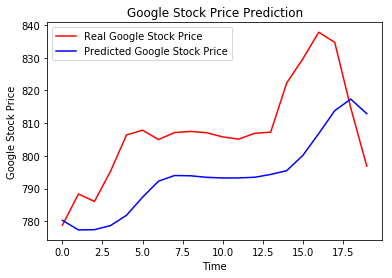

In [24]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()